# Excercise 1: Autoencoder

We have allready seen a simple MLP model for **MNIST** classification:

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Get the data as Numpy arrays
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Build a simple model
inputs = keras.Input(shape=(28, 28))
l1 = layers.experimental.preprocessing.Rescaling(1.0 / 255)(inputs)
l2 = layers.Flatten()(l1)
l3 = layers.Dense(128, activation="tanh")(l2)
l4 = layers.Dense(128, activation="tanh")(l3)
outputs = layers.Dense(10, activation="softmax")(l4)
model = keras.Model(inputs, outputs)
model.summary()

# Compile the model
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy")

# Train the model for 1 epoch from Numpy data
batch_size = 64
print("Fit on NumPy data")
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=1)

# Train the model for 1 epoch using a dataset
dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(batch_size)
print("Fit on Dataset")
history = model.fit(dataset, epochs=1)


11493376/11490434 [==============================] - 0s 0us/step
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
rescaling (Rescaling)        (None, 28, 28)            0         
_________________________________________________________________
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable 

Now we want to change this model and build an **autoencoder** for **MNIST**:

**1. change the network topology:** 
* use 5 dense layers to form "bottleneck" network (see lecture). 
* Layers 1+2 should be the encoder, 3 the lattent layer aner 4+5 the decoder
* remove the softmax (we are not doing a classification anymore)

**2. change the loss-function to compare input and output -> choose a suitable loss from https://keras.io/api/losses/**

**3. train the model**

**4. test the model**
* visualize input and output images to inspect the reconstruction quallity (use MATPLOTLIB *imshow*)
* implement a function to measure the reconstrunction error between in- and output
* change network size (number of neurons per layer) and training paramters to optimize the ressults 

**5. Outlier detection**
* plot a histogram over the the recostruction errors
* find a cutoff value and visualize the outliers

**change the network topology**

In [13]:



inputs = keras.Input(shape=(28, 28))
l1 = layers.experimental.preprocessing.Rescaling(1.0 / 255)(inputs)
l2 = layers.Flatten()(l1)
l3 = layers.Dense(128, activation="tanh")(l2)
l4 = layers.Dense(64, activation="tanh")(l3)
l5 = layers.Dense(32, activation="tanh")(l4)
l6 = layers.Dense(64, activation="tanh")(l5)
l7 = layers.Dense(128, activation="tanh")(l6)
l8 = layers.Dense(units=784, activation='sigmoid')(l7)
l9 = layers.Reshape((28,28))(l8)
outputs = layers.experimental.preprocessing.Rescaling(255)(l9)
model = keras.Model(inputs, outputs)
model.summary()

Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
rescaling_14 (Rescaling)     (None, 28, 28)            0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_38 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_39 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_40 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_41 (Dense)             (None, 64)                2112

**change the loss-function to compare input and output bold text**

In [0]:
model.compile(optimizer="adam", loss="binary_crossentropy")

In [17]:
batch_size = 64
history = model.fit(x_train, x_train, batch_size=batch_size, epochs=50)

Epoch 1/50
938/938 [==============================] - 2s 2ms/step - loss: -492.8315
Epoch 2/50
938/938 [==============================] - 2s 2ms/step - loss: -492.8313
Epoch 3/50
938/938 [==============================] - 2s 2ms/step - loss: -492.8316
Epoch 4/50
938/938 [==============================] - 2s 2ms/step - loss: -492.8313
Epoch 5/50
938/938 [==============================] - 2s 2ms/step - loss: -492.8310
Epoch 6/50
938/938 [==============================] - 2s 2ms/step - loss: -492.8312
Epoch 7/50
938/938 [==============================] - 2s 2ms/step - loss: -492.8308
Epoch 8/50
938/938 [==============================] - 2s 2ms/step - loss: -492.8312
Epoch 9/50
938/938 [==============================] - 2s 2ms/step - loss: -492.8312
Epoch 10/50
938/938 [==============================] - 2s 2ms/step - loss: -492.8315
Epoch 11/50
938/938 [==============================] - 2s 2ms/step - loss: -492.8313
Epoch 12/50
938/938 [==============================] - 2s 2ms/step - loss:

In [0]:
predicted = model.predict(x_test)

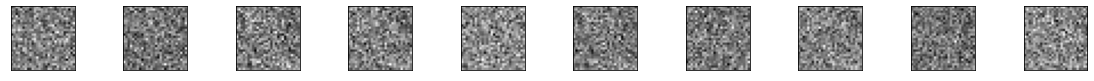

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(40, 4))
for i in range(10):
    ax = plt.subplot(3, 20, 2*20 +i+ 1)
    plt.imshow(predicted[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)